# GridSearchCV results analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

path_prefix = "./gridsearch-results"

### Loading dataframe

In [2]:
def load_and_prune_dataframe(path):
    df = pd.read_csv(path)
    df['mean_test_mean_absolute_error'] = (-1)*df['mean_test_neg_mean_absolute_error']
    df['mean_train_mean_absolute_error'] = (-1)*df['mean_train_neg_mean_absolute_error']
    df['mean_test_mean_squared_error'] = (-1)*df['mean_test_neg_mean_squared_error']
    df['mean_train_mean_squared_error'] = (-1)*df['mean_train_neg_mean_squared_error']
    df = df.drop(['params',
                  'split0_test_neg_mean_absolute_error',
                  'split1_test_neg_mean_absolute_error',
                  'split2_test_neg_mean_absolute_error',
                  'split3_test_neg_mean_absolute_error',
                  'split4_test_neg_mean_absolute_error',
                  'split0_train_neg_mean_absolute_error',
                  'split1_train_neg_mean_absolute_error',
                  'split2_train_neg_mean_absolute_error',
                  'split3_train_neg_mean_absolute_error',
                  'split4_train_neg_mean_absolute_error',
                  'split0_test_neg_mean_squared_error',
                  'split1_test_neg_mean_squared_error',
                  'split2_test_neg_mean_squared_error',
                  'split3_test_neg_mean_squared_error',
                  'split4_test_neg_mean_squared_error',
                  'split0_train_neg_mean_squared_error',
                  'split1_train_neg_mean_squared_error',
                  'split2_train_neg_mean_squared_error',
                  'split3_train_neg_mean_squared_error',
                  'split4_train_neg_mean_squared_error',
                  'split0_test_r2', 
                  'split1_test_r2', 
                  'split2_test_r2', 
                  'split3_test_r2',
                  'split4_test_r2',
                  'split0_train_r2', 
                  'split1_train_r2', 
                  'split2_train_r2',
                  'split3_train_r2', 
                  'split4_train_r2'], 
            axis=1)
    
    return df

## Import linear results

In [3]:
linear_df = load_and_prune_dataframe(f"{path_prefix}/linear.csv")

In [4]:
linear_C = linear_df['param_C'].to_numpy().reshape((6,5))
linear_epsilon = linear_df['param_epsilon'].to_numpy().reshape((6,5))

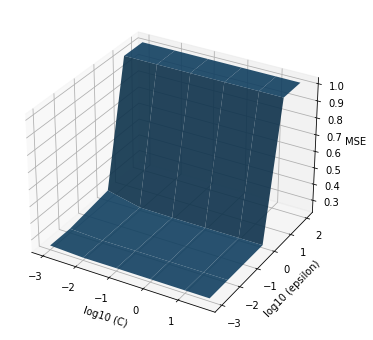

In [84]:
linear_mean_test_mse = linear_df['mean_test_mean_squared_error'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_mse, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

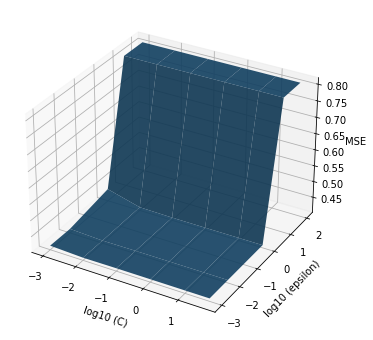

In [85]:
linear_mean_test_mae = linear_df['mean_test_mean_absolute_error'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_mae, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

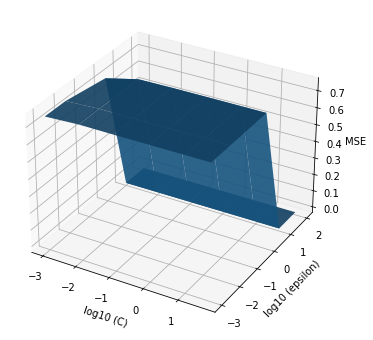

In [86]:
linear_mean_test_r2 = linear_df['mean_test_r2'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_r2, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

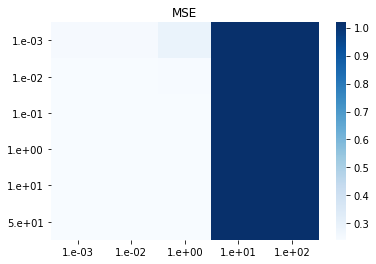

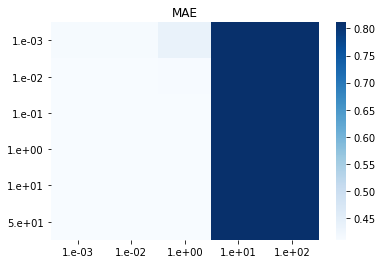

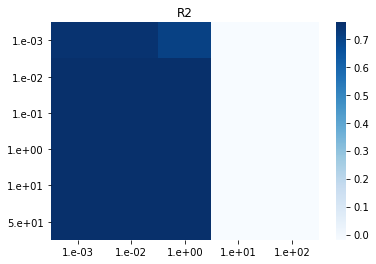

In [34]:
plt.title("MSE")
sns.heatmap(linear_mean_test_mse, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

plt.title("MAE")
sns.heatmap(linear_mean_test_mae, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

plt.title("R2")
sns.heatmap(linear_mean_test_r2, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

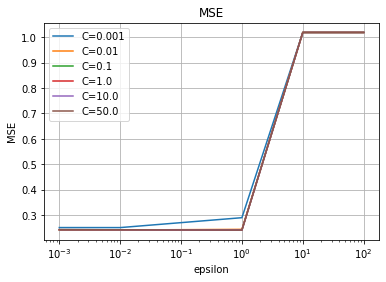

In [59]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_squared_error'], label=f"C={name}")

plt.title("MSE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.show()

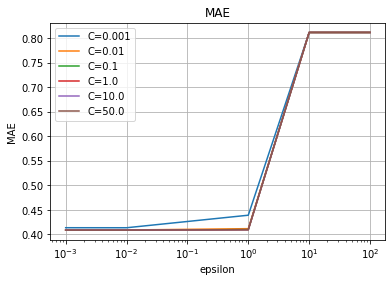

In [56]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_train_mean_absolute_error'], label=f"C={name}")

plt.title('MAE')
plt.xscale('log')
plt.ylabel('MAE')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

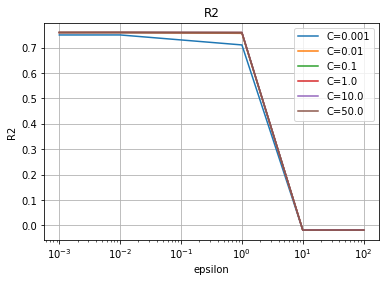

In [57]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_train_r2'], label=f"C={name}")

plt.title('R2')
plt.xscale('log')
plt.ylabel('R2')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

## Import rbf results

In [11]:
rbf_df = load_and_prune_dataframe(f"{path_prefix}/rbf.csv")

In [12]:
rbf_C = rbf_df['param_C'].to_numpy().reshape((5,5))
rbf_epsilon = rbf_df['param_epsilon'].to_numpy().reshape((5,5))

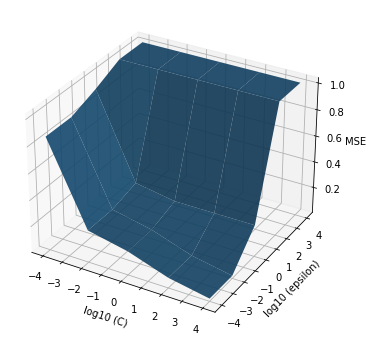

In [72]:
rbf_mean_test_mse = rbf_df['mean_test_mean_squared_error'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_mse, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

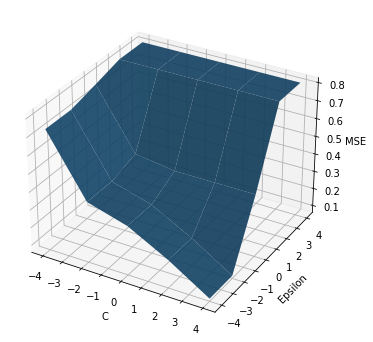

In [40]:
rbf_mean_test_mae = rbf_df['mean_test_mean_absolute_error'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_mae, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

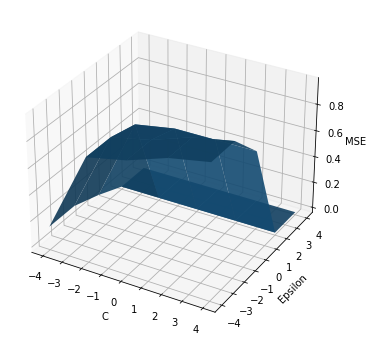

In [83]:
rbf_mean_test_r2 = rbf_df['mean_test_r2'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_r2, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')

plt.show()

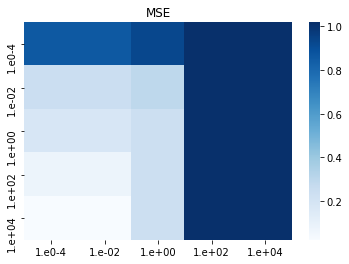

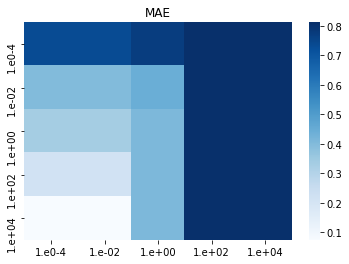

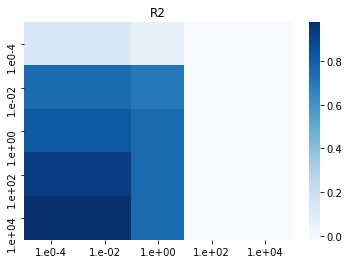

In [32]:
plt.title("MSE")
sns.heatmap(rbf_mean_test_mse, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

plt.title("MAE")
sns.heatmap(rbf_mean_test_mae, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

plt.title("R2")
sns.heatmap(rbf_mean_test_r2, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

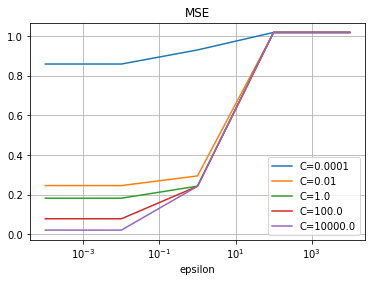

In [52]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_squared_error'], label=f"C={name}")

plt.title("MSE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

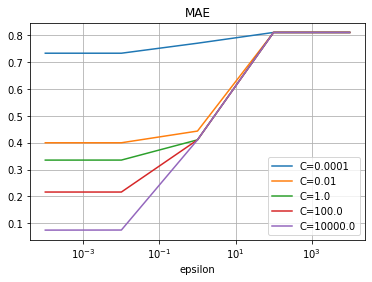

In [51]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_absolute_error'], label=f"C={name}")

plt.title("MAE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

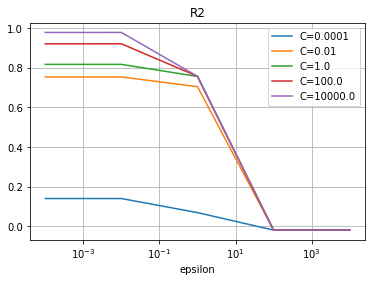

In [50]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_r2'], label=f"C={name}")

plt.title("R2")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()